## **DA5401 Assignment 3**
**Name - Adarsh Mahaveer Tare**

**Roll No - MM22B016**


### **Outline:**

Part A: Baseline Model and Data Analysis

Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling

Part C: Performance Evaluation and Conclusion

## **Part A: Baseline Model and Data Analysis**

### **Load dataset & check distribution**

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset shape: (284807, 31)

Missing values in each column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


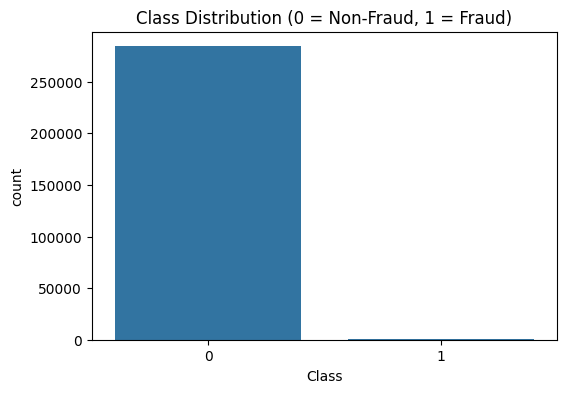

In [44]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("creditcard.csv")

# Display first few rows
display(data.head())

# Check dataset shape
print("\nDataset shape:", data.shape)

# Check for null values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Print class distribution
print("\nClass Distribution:")
print(data['Class'].value_counts())

# Visualize class imbalance
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=data)
plt.title("Class Distribution (0 = Non-Fraud, 1 = Fraud)")
plt.show()


### **Train-test split maintaining imbalance**

In [45]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data (keeping test set representative of imbalance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("\nFraud cases in training set:", sum(y_train))
print("Fraud cases in test set:", sum(y_test))


Training set shape: (199364, 30)
Testing set shape: (85443, 30)

Fraud cases in training set: 344
Fraud cases in test set: 148


### **Train Logistic Regression on imbalanced data**

In [46]:
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train on imbalanced dataset
log_reg.fit(X_train, y_train)

print("Baseline Logistic Regression model trained successfully.")


Baseline Logistic Regression model trained successfully.


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Model evaluation**

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on test set
y_pred = log_reg.predict(X_test)

# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))


Confusion Matrix:
[[85276    19]
 [   51    97]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     85295
           1     0.8362    0.6554    0.7348       148

    accuracy                         0.9992     85443
   macro avg     0.9178    0.8276    0.8672     85443
weighted avg     0.9991    0.9992    0.9991     85443



**Explanation**

**Accuracy is not a reliable metric in highly imbalanced datasets.**

* Since fraud cases are extremely rare, a model predicting all transactions as “non-fraud” would achieve very high accuracy but completely fail at identifying fraud.

* Precision (how many predicted frauds are actually fraud) and Recall (how many real frauds are correctly identified) are far more useful.

* F1-score, the harmonic mean of Precision and Recall, balances both metrics and is the best measure when both false positives and false negatives matter.

## **Part B: Gaussian Mixture Model (GMM) for Synthetic Sampling**

**Theoretical Foundation: GMM vs SMOTE**

- **SMOTE**: Creates synthetic points by interpolating between neighbors. Simple, but may cross class boundaries and assumes convex clusters.
- **GMM**: Learns a probabilistic model of the minority class (mixture of Gaussians). Each Gaussian captures local structure with mean & covariance.
- GMM handles multiple sub-groups and correlations between features better.
- Useful when minority class is multimodal or complex. More realistic than SMOTE, though requires tuning (number of components).


## **Prepare minority & majority sets**

In [48]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Step 1: Separate minority and majority samples from training data
X_train_min = X_train[y_train == 1].copy()   # Fraudulent transactions (minority)
X_train_maj = X_train[y_train == 0].copy()   # Non-fraudulent transactions (majority)

# Count samples in each group
n_min, n_maj = len(X_train_min), len(X_train_maj)
print("Minority samples:", n_min)
print("Majority samples:", n_maj)

# Step 2: Feature Scaling
# GMM assumes continuous distributions; scaling helps to normalize features
scaler = StandardScaler()
scaler.fit(X_train)   # Fit scaler on training data

# Transform both minority and majority training sets
X_train_min_s = scaler.transform(X_train_min)
X_train_maj_s = scaler.transform(X_train_maj)

print("Scaling complete. Scaled minority shape:", X_train_min_s.shape)


Minority samples: 344
Majority samples: 199020
Scaling complete. Scaled minority shape: (344, 30)


## **Fit GMM & choose best k**

k=1, BIC=34906.7, AIC=33005.6
k=2, BIC=29013.3, AIC=25207.2
k=3, BIC=22227.7, AIC=16516.7
k=4, BIC=24331.1, AIC=16715.1
k=5, BIC=23897.8, AIC=14376.9
k=6, BIC=22646.4, AIC=11220.5
k=7, BIC=23424.5, AIC=10093.6
k=8, BIC=25310.0, AIC=10074.2
k=9, BIC=26185.8, AIC=9045.0
k=10, BIC=25683.2, AIC=6637.4


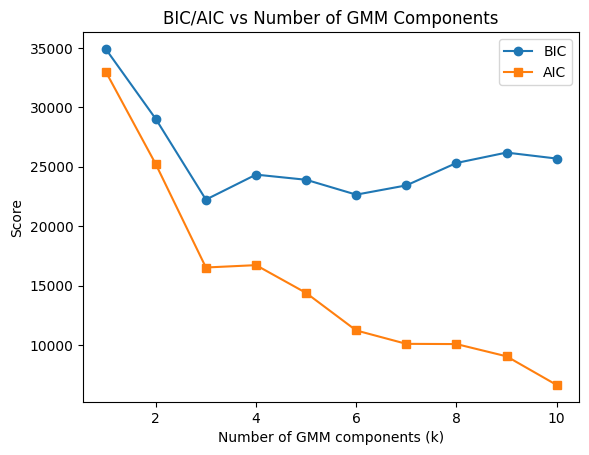

Best k chosen by BIC: 3


In [49]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Step 1: Define range of possible components (k)
k_range = range(1, 11)  # Trying 1 to 10 components
bics, aics, gmm_models = [], [], {}

# Step 2: Fit GMM for each k and record BIC/AIC
for k in k_range:
    gmm = GaussianMixture(
        n_components=k,
        covariance_type='full',   # Full covariance matrices
        random_state=42,
        n_init=5,                 # Multiple initializations
        max_iter=200
    )
    gmm.fit(X_train_min_s)

    bics.append(gmm.bic(X_train_min_s))   # Bayesian Information Criterion
    aics.append(gmm.aic(X_train_min_s))   # Akaike Information Criterion
    gmm_models[k] = gmm

    print(f"k={k}, BIC={bics[-1]:.1f}, AIC={aics[-1]:.1f}")

# --- Step 3: Plot BIC/AIC to visualize best k ---
plt.plot(k_range, bics, marker='o', label='BIC')
plt.plot(k_range, aics, marker='s', label='AIC')
plt.xlabel("Number of GMM components (k)")
plt.ylabel("Score")
plt.legend()
plt.title("BIC/AIC vs Number of GMM Components")
plt.show()

# --- Step 4: Choose best k using BIC ---
best_k = k_range[int(np.argmin(bics))]
best_gmm = gmm_models[best_k]
print("Best k chosen by BIC:", best_k)


 **Choosing k**

- Tried k = 1 to 10 components.  
- Computed **BIC** and **AIC** for each.  
- Picked the k with the **lowest BIC** (balances fit and simplicity).  


### **Generate synthetic samples**

In [50]:
# Step 1: Decide how many synthetic samples to generate
undersample_factor = 4                     # Desired ratio of majority to minority
target_majority_size = int(n_min * undersample_factor)  # New target for majority class

# Number of synthetic minority samples needed to match target
n_to_generate = max(0, target_majority_size - n_min)
print("Synthetic samples needed:", n_to_generate)

# Step 2: Generate synthetic samples using GMM
if n_to_generate > 0:
    # gmm.sample() gives samples in scaled space
    sampled_s, _ = best_gmm.sample(n_samples=n_to_generate)

    # Inverse transform back to original feature space
    sampled = scaler.inverse_transform(sampled_s)

    # Store in DataFrame for easy merging
    sampled_df = pd.DataFrame(sampled, columns=X_train.columns)
    print("Generated synthetic minority samples:", sampled_df.shape)
else:
    sampled_df = pd.DataFrame(columns=X_train.columns)
    print("No synthetic samples needed.")


Synthetic samples needed: 1032
Generated synthetic minority samples: (1032, 30)


 **Sampling from GMM**

1. Choose a Gaussian component based on mixture weights.  
2. Sample a point from its multivariate normal distribution.  
3. Repeat until required number of samples is generated.  


### **Clustering-Based Undersampling**

In [51]:
from sklearn.cluster import KMeans

# Step 1: Choose number of clusters for majority class
c = int(min(50, max(10, int(np.sqrt(n_maj)))))  # Heuristic: sqrt(n_majority), capped at 50
print("Using", c, "clusters for majority class.")

# Step 2: Fit KMeans on majority samples
kmeans = KMeans(n_clusters=c, random_state=42, n_init=10)
maj_labels = kmeans.fit_predict(X_train_maj_s)

# Create DataFrame with cluster assignments
maj_df = pd.DataFrame(X_train_maj, columns=X_train.columns)
maj_df['cluster'] = maj_labels

# Step 3: Allocate how many samples to keep per cluster
cluster_counts = maj_df['cluster'].value_counts().sort_index()
cluster_props = cluster_counts / cluster_counts.sum()

alloc_float = cluster_props * target_majority_size
alloc_floor = np.floor(alloc_float).astype(int)
remaining = target_majority_size - alloc_floor.sum()

# Distribute remainder to clusters with highest fractional part
fractional = alloc_float - alloc_floor
for idx in fractional.sort_values(ascending=False).index[:remaining]:
    alloc_floor.loc[idx] += 1

# Step 4: Sample from each cluster
reduced_maj_samples = []
for cluster_id, to_keep in alloc_floor.items():
    subset = maj_df[maj_df['cluster'] == cluster_id].sample(
        n=to_keep, random_state=42, replace=False
    )
    reduced_maj_samples.append(subset.drop(columns='cluster'))

# Final reduced majority set
reduced_maj_df = pd.concat(reduced_maj_samples, ignore_index=True)
print("Reduced majority size:", reduced_maj_df.shape)


Using 50 clusters for majority class.
Reduced majority size: (1376, 30)


** Clustering-Based Undersampling (CBU)**

- Clustered majority class with KMeans.  
- Kept samples proportional to each cluster’s size.  
- Ensures diversity and avoids dropping rare regions.  


### **Final Balanced Dataset**

In [52]:
# Step 1: Combine minority (original + synthetic)
aug_min_df = pd.concat([X_train_min.reset_index(drop=True), sampled_df], ignore_index=True)

# Step 2: Adjust minority to match reduced majority
if aug_min_df.shape[0] > reduced_maj_df.shape[0]:
    # Downsample minority to match
    aug_min_df = aug_min_df.sample(n=reduced_maj_df.shape[0], random_state=42)
elif aug_min_df.shape[0] < reduced_maj_df.shape[0]:
    # If still smaller, generate more synthetic points
    needed = reduced_maj_df.shape[0] - aug_min_df.shape[0]
    sampled_s2, _ = best_gmm.sample(n_samples=needed)
    sampled2 = scaler.inverse_transform(sampled_s2)
    sampled2_df = pd.DataFrame(sampled2, columns=X_train.columns)
    aug_min_df = pd.concat([aug_min_df, sampled2_df], ignore_index=True)

# --- Step 3: Create final balanced dataset ---
balanced_X_train = pd.concat([reduced_maj_df, aug_min_df], ignore_index=True)
balanced_y_train = pd.Series([0]*len(reduced_maj_df) + [1]*len(aug_min_df))

print("Balanced training set shape:", balanced_X_train.shape)
print("Class counts:", balanced_y_train.value_counts().to_dict())


Balanced training set shape: (2752, 30)
Class counts: {0: 1376, 1: 1376}


**Summary of Part B**

- Fitted GMM on minority samples and picked k using BIC.  
- Generated synthetic fraud samples using the GMM.  
- Reduced majority class with CBU to keep diversity.  
- Combined both → Final balanced dataset ready for Part C.  


## **Part C: Performance Evaluation and Conclusion**


 **Train three Logistic Regression models:**
  1) Baseline (trained on imbalanced data)
  2) GMM-only oversampling (minority oversampled to match original majority)
  3) GMM + CBU (reduced majority + synthetic minority) — from Part B

- Evaluate all on the original imbalanced test set and compare Precision, Recall, F1 for the minority (fraud) class.
- Summarize results with a table and bar chart, then discuss and give a final recommendation.


### **Ensure baseline model exists (train if not)**

In [53]:
# Ensure baseline model exists: if not present, train it on imbalanced training data
from sklearn.linear_model import LogisticRegression

# If log_reg already in the notebook, use it; otherwise train a fresh baseline on X_train / y_train
try:
    log_reg  # check existence
    print("Baseline model 'log_reg' already exists in the session. Using existing model.")
except NameError:
    # Train a baseline logistic regression on the original imbalanced training set
    print("Baseline model not found — training LogisticRegression on imbalanced training data.")
    log_reg = LogisticRegression(max_iter=1000, random_state=42)
    log_reg.fit(X_train, y_train)
    print("Baseline trained.")


Baseline model 'log_reg' already exists in the session. Using existing model.


### **Build GMM-only oversampled training set (minority -> match original majority)**

In [54]:
# --- Create a GMM-only oversampled dataset where minority is oversampled to match the original majority ---
# We assume best_gmm and scaler were created in Part B. If not, you'll need to run Part B first.

# Number of minority samples in training set (original)
n_min = len(X_train[y_train == 1])
n_maj_original = len(X_train[y_train == 0])

# How many synthetic samples to generate so minority_total == original majority size
n_needed_gmm_only = max(0, n_maj_original - n_min)
print("Original minority:", n_min, "Original majority:", n_maj_original)
print("Synthetic to generate for GMM-only:", n_needed_gmm_only)

# Generate synthetic points from the best_gmm (in scaled space) and inverse transform
if n_needed_gmm_only > 0:
    sampled_s_go, _ = best_gmm.sample(n_samples=n_needed_gmm_only)
    sampled_go = scaler.inverse_transform(sampled_s_go)
    sampled_go_df = pd.DataFrame(sampled_go, columns=X_train.columns)
else:
    sampled_go_df = pd.DataFrame(columns=X_train.columns)

# Combine with original minority rows to form oversampled minority set
orig_min_df = X_train[y_train == 1].reset_index(drop=True)
gmm_oversampled_minority = pd.concat([orig_min_df, sampled_go_df], ignore_index=True)

# Combine with full original majority (no undersampling)
gmm_only_X_train = pd.concat([X_train[y_train == 0].reset_index(drop=True), gmm_oversampled_minority], ignore_index=True)
gmm_only_y_train = pd.Series([0]* (n_maj_original) + [1]* (gmm_oversampled_minority.shape[0]))

print("GMM-only training set shape:", gmm_only_X_train.shape)
print("Class counts (GMM-only):", gmm_only_y_train.value_counts().to_dict())


Original minority: 344 Original majority: 199020
Synthetic to generate for GMM-only: 198676
GMM-only training set shape: (398040, 30)
Class counts (GMM-only): {0: 199020, 1: 199020}


### **Train logistic models on the two GMM-balanced versions**

In [55]:
from sklearn.linear_model import LogisticRegression
import time

# Model 1: Baseline (log_reg) — already trained on imbalanced (kept as-is)
# Model 2: GMM-only oversampling (train new)
gmm_only_clf = LogisticRegression(max_iter=1000, random_state=42)
t0 = time.time()
gmm_only_clf.fit(gmm_only_X_train, gmm_only_y_train)
t1 = time.time()
print(f"GMM-only LogisticRegression trained in {t1 - t0:.2f}s")

# Model 3: GMM + CBU balanced set (balanced_X_train, balanced_y_train) from Part B
# Ensure balanced_X_train and balanced_y_train exist
try:
    balanced_X_train
    balanced_y_train
except NameError:
    raise RuntimeError("balanced_X_train / balanced_y_train not found. Please run Part B cells first.")

gmm_cbu_clf = LogisticRegression(max_iter=1000, random_state=42)
t0 = time.time()
gmm_cbu_clf.fit(balanced_X_train, balanced_y_train)
t1 = time.time()
print(f"GMM+CBU LogisticRegression trained in {t1 - t0:.2f}s")


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GMM-only LogisticRegression trained in 116.37s
GMM+CBU LogisticRegression trained in 1.67s


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### **Evaluate all models on original imbalanced test set**

In [56]:
# --- Evaluate baseline, GMM-only, and GMM+CBU on X_test / y_test ---
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support,
    roc_auc_score,
    average_precision_score
)
import numpy as np

# Helper to compute metrics and store them
def evaluate_model(clf, X_test, y_test):
    # Get predictions and predicted probabilities
    y_pred = clf.predict(X_test)
    # For ROC/PR AUC, get probability for positive class if available
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)[:, 1]
    elif hasattr(clf, "decision_function"):
        y_prob = clf.decision_function(X_test)
        # decision_function may not be in [0,1], but roc_auc_score accepts it
    else:
        y_prob = None

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    # Precision, Recall, F1 (for class 1)
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, labels=[1], average='binary', zero_division=0)
    # ROC AUC and PR AUC if probabilities available
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan
    pr_auc = average_precision_score(y_test, y_prob) if y_prob is not None else np.nan

    return {
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "roc_auc": roc_auc,
        "pr_auc": pr_auc
    }

# Evaluate baseline
baseline_metrics = evaluate_model(log_reg, X_test, y_test)
print("Baseline metrics (minority class):")
print(f" Precision: {baseline_metrics['precision']:.4f}, Recall: {baseline_metrics['recall']:.4f}, F1: {baseline_metrics['f1']:.4f}")
print(" Confusion Matrix:\n", baseline_metrics['confusion_matrix'])

# Evaluate GMM-only
gmm_only_metrics = evaluate_model(gmm_only_clf, X_test, y_test)
print("\nGMM-only metrics (minority class):")
print(f" Precision: {gmm_only_metrics['precision']:.4f}, Recall: {gmm_only_metrics['recall']:.4f}, F1: {gmm_only_metrics['f1']:.4f}")
print(" Confusion Matrix:\n", gmm_only_metrics['confusion_matrix'])

# Evaluate GMM+CBU
gmm_cbu_metrics = evaluate_model(gmm_cbu_clf, X_test, y_test)
print("\nGMM+CBU metrics (minority class):")
print(f" Precision: {gmm_cbu_metrics['precision']:.4f}, Recall: {gmm_cbu_metrics['recall']:.4f}, F1: {gmm_cbu_metrics['f1']:.4f}")
print(" Confusion Matrix:\n", gmm_cbu_metrics['confusion_matrix'])


Baseline metrics (minority class):
 Precision: 0.8362, Recall: 0.6554, F1: 0.7348
 Confusion Matrix:
 [[85276    19]
 [   51    97]]

GMM-only metrics (minority class):
 Precision: 0.0642, Recall: 0.8716, F1: 0.1197
 Confusion Matrix:
 [[83416  1879]
 [   19   129]]

GMM+CBU metrics (minority class):
 Precision: 0.0646, Recall: 0.8649, F1: 0.1202
 Confusion Matrix:
 [[83441  1854]
 [   20   128]]


### **Create summary table and bar chart comparing metrics**

Summary results (minority class metrics):


,model,precision,recall,f1,roc_auc,pr_auc
0,Baseline (imbalanced),0.836207,0.655405,0.734848,0.934336,0.679279
1,GMM-only oversample,0.064243,0.871622,0.119666,0.969305,0.670412
2,GMM + CBU,0.064581,0.864865,0.120188,0.965249,0.686738


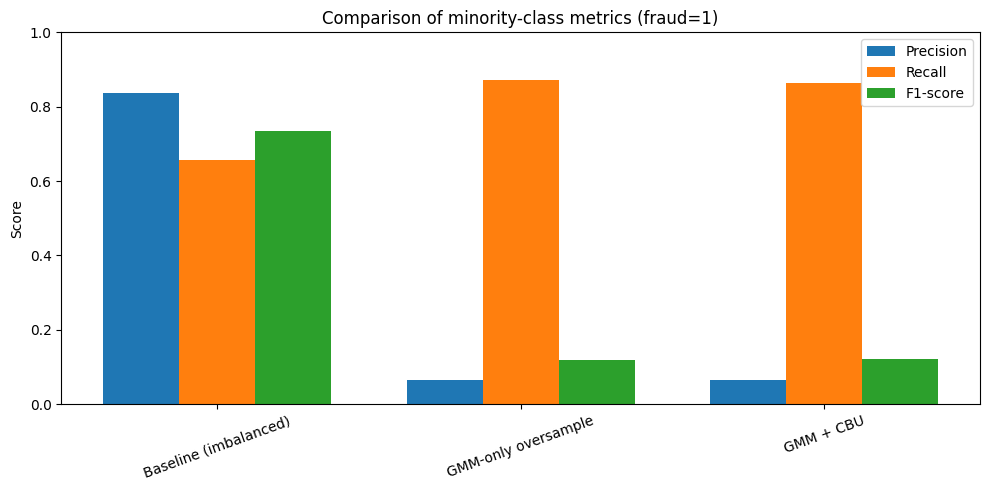

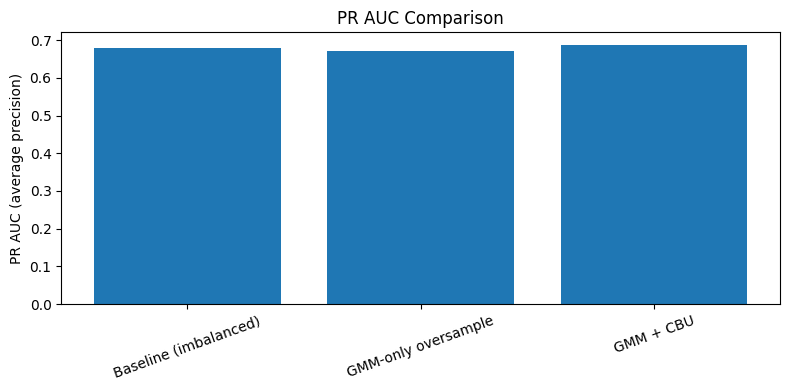

In [57]:
# --- Create a summary DataFrame with Precision / Recall / F1 / ROC-AUC / PR-AUC ---
import pandas as pd
import matplotlib.pyplot as plt

results = pd.DataFrame({
    "model": ["Baseline (imbalanced)", "GMM-only oversample", "GMM + CBU"],
    "precision": [baseline_metrics['precision'], gmm_only_metrics['precision'], gmm_cbu_metrics['precision']],
    "recall":    [baseline_metrics['recall'],    gmm_only_metrics['recall'],    gmm_cbu_metrics['recall']],
    "f1":        [baseline_metrics['f1'],        gmm_only_metrics['f1'],        gmm_cbu_metrics['f1']],
    "roc_auc":   [baseline_metrics['roc_auc'],   gmm_only_metrics['roc_auc'],   gmm_cbu_metrics['roc_auc']],
    "pr_auc":    [baseline_metrics['pr_auc'],    gmm_only_metrics['pr_auc'],    gmm_cbu_metrics['pr_auc']]
})

# Display table
print("Summary results (minority class metrics):")
display(results)

# Bar chart for Precision/Recall/F1
metrics_to_plot = ["precision", "recall", "f1"]
x = np.arange(len(results['model']))
width = 0.25

plt.figure(figsize=(10,5))
plt.bar(x - width, results['precision'], width, label='Precision')
plt.bar(x, results['recall'], width, label='Recall')
plt.bar(x + width, results['f1'], width, label='F1-score')
plt.xticks(x, results['model'], rotation=20)
plt.ylabel("Score")
plt.ylim(0, 1.0)
plt.title("Comparison of minority-class metrics (fraud=1)")
plt.legend()
plt.tight_layout()
plt.show()

# Optional: plot ROC AUC and PR-AUC side-by-side
plt.figure(figsize=(8,4))
plt.bar(results['model'], results['pr_auc'])
plt.ylabel("PR AUC (average precision)")
plt.title("PR AUC Comparison")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


 **Comparative Analysis**

- The table and bar chart above compare Precision, Recall, and F1 for the minority (fraud=1) class across:
  Baseline (imbalanced), GMM-only oversampling, and GMM+CBU.

- Key points to examine:
  - Did Recall (ability to find frauds) improve? This is often the most important metric in fraud detection.
  - What happened to Precision (false positive rate)? Large gains in recall sometimes reduce precision.
  - F1 balances precision and recall and is useful for overall comparison.
- Also check PR AUC (average precision) — this summarizes precision vs recall across thresholds.


**Final Recommendation**

- If GMM-based oversampling (either GMM-only or GMM+CBU) increases Recall and F1 without unacceptable loss of Precision, it is beneficial for fraud detection because catching more frauds is the priority.
- **GMM is recommended** when the minority class appears multimodal or shows complex covariance structure (it then generates realistic synthetic samples).
- Between GMM-only and GMM+CBU:
  - GMM-only keeps full majority information but can lead to a very large training set (costly).
  - GMM+CBU reduces majority redundancy while preserving diversity — often a practical compromise.
- Final choice depends on results: prefer the model with best Recall/F1 for the minority while keeping Precision at an acceptable level.
